# Language Model for Hate Speech Detection: A case study aimed at detecting misogyny in Spanish texts

# Test 1:Learning Assessment
At this point, we have a set $D$ containig  $7190$ $m$- dimensional feature vectors with $m=768$. From this set, we have created a model called "misogyny recognizer" based on Logistic Regression. In order to find the  best values for all weights and bias  of the model, a learning process was carried out. Such a process consisted of examining a subset $T\subset D$ and attempting to find a model that minimizes a loss function. The resulting model was evaluated to predict the responses for the features vectors in the remaining subset $T-D$, usually called validation set, from which we can get an unbiased evaluation of the model fit on $T$.

Since a single iteration of this process does not guarantee the overall performance of the model, we resorted to a systematic sampling based on $k$-folds cross-validation that allows us to  get different and unbiased choices of the  sets $T$ and $T-D$ in order to attempt a generalization of the model performance. We set $k=10$ and executed $k$-folds $100$ times by changing random seed value obtaining an statistical approximation to the real performance values.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
results = pd.read_csv(io.BytesIO(uploaded['20210705_LearningAssessment.csv']), header=0, encoding="utf-8",sep=",")
results.head()


Saving 20210830_LearningAssessment.csv to 20210830_LearningAssessment.csv


,Unnamed: 0,IdExperiment,Accuracy,Precision,Recall,F1-Score
0,0,0,0.898305,0.906250,0.906250,0.906250
1,1,0,0.932203,0.924242,0.953125,0.938462
2,2,0,0.923729,0.910448,0.953125,0.931298
3,3,0,0.949153,0.953125,0.953125,0.953125
4,4,0,0.914530,0.875000,0.984375,0.926471


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

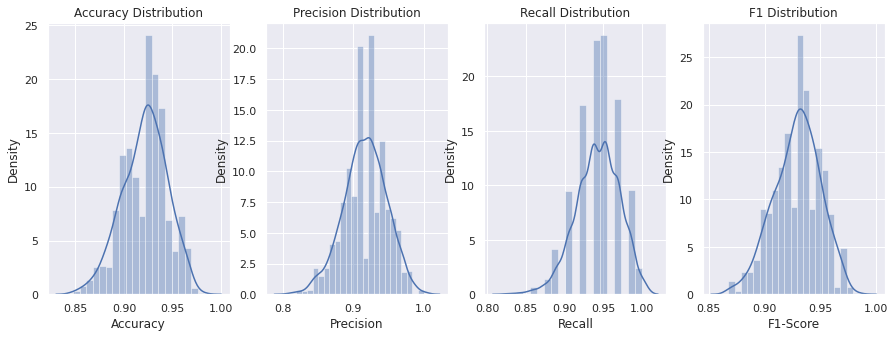

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); 
width1 = 15
height1 = 5
rows=1
columns=4
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1)
 
plt.subplot(rows, columns, 1)
plt.title("Accuracy Distribution")
ax = sns.distplot(results.Accuracy)

plt.subplot(rows, columns, 2)
plt.title("Precision Distribution")
ax = sns.distplot(results.Precision)

plt.subplot(rows, columns, 3)
plt.title("Recall Distribution")
ax = sns.distplot(results.Recall)

plt.subplot(rows, columns, 4)
plt.title("F1 Distribution")
ax = sns.distplot(results['F1-Score'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Accuracy
q1 0.9096045197740112
q2 0.9213483146067416
q3 0.9378531073446328
max 0.9831460674157304
min 0.8539325842696629
Rango intercuantil: 0.02824858757062154
Intervalo de Confianza (teórico) [0,0]
Intervalo de Confianza [0.867232,0.980226]
Precision
q1 0.9166666666666666
q2 0.931297709923664
q3 0.9448818897637796
max 0.9914529914529916
min 0.8571428571428571
Rango intercuantil: 0.028215223097112996
Intervalo de Confianza (teórico) [0.874344,0.987205]
Intervalo de Confianza [0.874344,0.987205]
Recall
q1 0.9516129032258064
q2 0.9596774193548387
q3 0.9758064516129032
max 1.0
min 0.8870967741935484
Rango intercuantil: 0.024193548387096864
Intervalo de Confianza (teórico) [0.915323,1.012097]
Intervalo de Confianza [0.915323,1.000000]
F1
q1 0.9365079365079364
q2 0.9457364341085271
q3 0.9558232931726908
max 0.9879518072289156
min 0.8976377952755904
Rango intercuantil: 0.01931535666475437
Intervalo de Confianza (teórico) [0.907535,0.984796]
Intervalo de Confianza [0.907535,0.984796]


<Figure size 432x288 with 0 Axes>

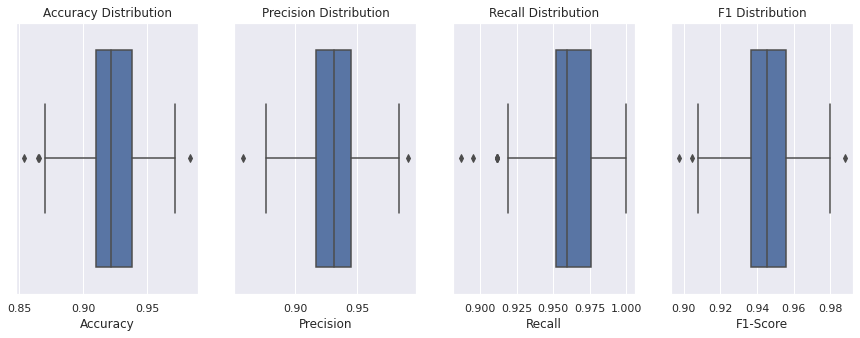

In [ ]:
width1 = 15
height1 = 5
rows=1
columns=4
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1) 

plt.subplot(rows, columns, 1)
plt.title("Accuracy Distribution")
ax = sns.boxplot(results.Accuracy)

print("Accuracy")
q1=results.Accuracy.quantile(q=0.25)
print("q1",q1)
q2=results.Accuracy.quantile(q=0.50)
print("q2",q2)
q3=results.Accuracy.quantile(q=0.75)
print("q3",q3)
max=results.Accuracy.max()
print("max",max)
min=results.Accuracy.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%d,%d]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))





plt.subplot(rows, columns, 2)
plt.title("Precision Distribution")
ax = sns.boxplot(results.Precision)
print("Precision")
q1=results.Precision.quantile(q=0.25)
print("q1",q1)
q2=results.Precision.quantile(q=0.50)
print("q2",q2)
q3=results.Precision.quantile(q=0.75)
print("q3",q3)
max=results.Precision.max()
print("max",max)
min=results.Precision.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

plt.subplot(rows, columns, 3)
plt.title("Recall Distribution")
ax = sns.boxplot(results.Recall)
print("Recall")
q1=results.Recall.quantile(q=0.25)
print("q1",q1)
q2=results.Recall.quantile(q=0.50)
print("q2",q2)
q3=results.Recall.quantile(q=0.75)
print("q3",q3)
max=results.Recall.max()
print("max",max)
min=results.Recall.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

plt.subplot(rows, columns, 4)
plt.title("F1 Distribution")
ax = sns.boxplot(results['F1-Score'])
print("F1")
q1=results['F1-Score'].quantile(q=0.25)
print("q1",q1)
q2=results['F1-Score'].quantile(q=0.50)
print("q2",q2)
q3=results['F1-Score'].quantile(q=0.75)
print("q3",q3)
max=results['F1-Score'].max()
print("max",max)
min=results['F1-Score'].min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

# Test 2: Assessment for Real Case

Inputs: Desempeño de tu método vs. Desempeño promedio reportado SEMEVAL
Method: T-student one sample

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
results = pd.read_csv(io.BytesIO(uploaded['20210830_LearningAssessment.csv']), header=0, encoding="utf-8",sep=",")
results.head()


Saving 20210830_LearningAssessment.csv to 20210830_LearningAssessment.csv


,Unnamed: 0,IdExperiment,Accuracy,Precision,Recall,F1-Score
0,0,0,0.898305,0.906250,0.906250,0.906250
1,1,0,0.932203,0.924242,0.953125,0.938462
2,2,0,0.923729,0.910448,0.953125,0.931298
3,3,0,0.949153,0.953125,0.953125,0.953125
4,4,0,0.914530,0.875000,0.984375,0.926471


In [ ]:
import numpy as np

sample_1=results[["IdExperiment","Accuracy"]].groupby(by=['IdExperiment']).mean().reset_index()["Accuracy"]
#sample_1=np.log10(sample_1)
sample_2=results[["IdExperiment","Precision"]].groupby(by=['IdExperiment']).mean().reset_index()["Precision"]
#sample_2=np.log10(sample_2)
sample_3=results[["IdExperiment","Recall"]].groupby(by=['IdExperiment']).mean().reset_index()["Recall"]
#sample_3=np.log10(sample_3)
sample_4=results[["IdExperiment","F1-Score"]].groupby(by=['IdExperiment']).mean().reset_index()["F1-Score"]
#sample_4=np.log10(sample_4)

0     0.926749
1     0.925098
2     0.919071
3     0.924229
4     0.918202
        ...   
95    0.918217
96    0.920810
97    0.924214
98    0.920795
99    0.921636
Name: Accuracy, Length: 100, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<Figure size 432x288 with 0 Axes>

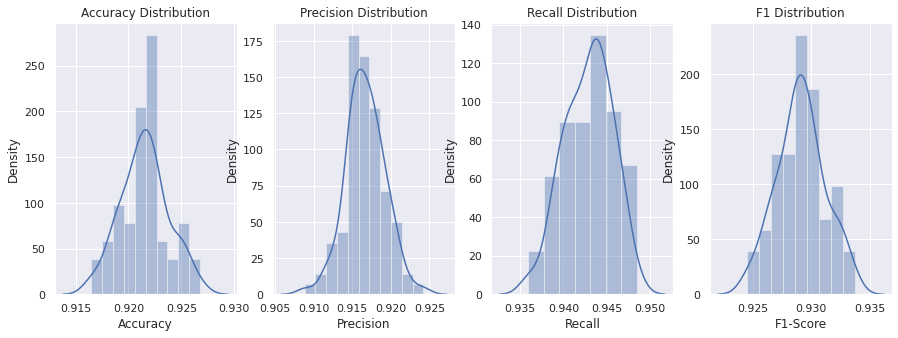

In [ ]:
import seaborn as sns, numpy as np
sns.set_theme(); 
width1 = 15
height1 = 5
rows=1
columns=4
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1)
 
plt.subplot(rows, columns, 1)
plt.title("Accuracy Distribution")
ax = sns.distplot(sample_1)

plt.subplot(rows, columns, 2)
plt.title("Precision Distribution")
ax = sns.distplot(sample_2)

plt.subplot(rows, columns, 3)
plt.title("Recall Distribution")
ax = sns.distplot(sample_3)

plt.subplot(rows, columns, 4)
plt.title("F1 Distribution")
ax = sns.distplot(sample_4)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Accuracy
q1 0.905982906
q2 0.923076923
q3 0.94017094
max 0.982905983
min 0.847457627
Rango intercuantil: 0.034188034000000034
Intervalo de Confianza (teórico) [0,0]
Intervalo de Confianza [0.854701,0.982906]
Precision
q1 0.897058824
q2 0.920634921
q3 0.9375
max 1.0
min 0.810810811
Rango intercuantil: 0.04044117599999997
Intervalo de Confianza (teórico) [0.836397,0.998162]
Intervalo de Confianza [0.836397,0.998162]
Recall
q1 0.921875
q2 0.9375
q3 0.96875
max 1.0
min 0.828125
Rango intercuantil: 0.046875
Intervalo de Confianza (teórico) [0.851562,1.039062]
Intervalo de Confianza [0.851562,1.000000]
F1
q1 0.9157050710000001
q2 0.9302325579999999
q3 0.94488189
max 0.984615385
min 0.867647059
Rango intercuantil: 0.02917681899999991
Intervalo de Confianza (teórico) [0.871940,0.988647]
Intervalo de Confianza [0.871940,0.984615]


<Figure size 432x288 with 0 Axes>

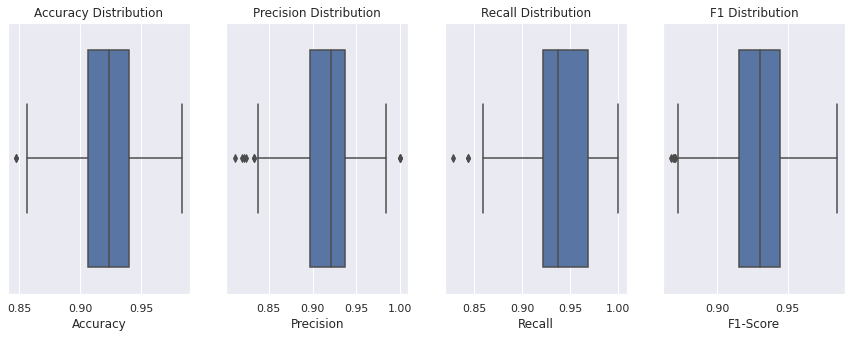

In [ ]:
width1 = 15
height1 = 5
rows=1
columns=4
width_height_1 = (width1, height1)
plt.clf() 
fig = plt.figure(figsize=width_height_1) 

plt.subplot(rows, columns, 1)
plt.title("Accuracy Distribution")
ax = sns.boxplot(results.Accuracy)

print("Accuracy")
q1=results.Accuracy.quantile(q=0.25)
print("q1",q1)
q2=results.Accuracy.quantile(q=0.50)
print("q2",q2)
q3=results.Accuracy.quantile(q=0.75)
print("q3",q3)
max=results.Accuracy.max()
print("max",max)
min=results.Accuracy.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%d,%d]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))


plt.subplot(rows, columns, 2)
plt.title("Precision Distribution")
ax = sns.boxplot(results.Precision)
print("Precision")
q1=results.Precision.quantile(q=0.25)
print("q1",q1)
q2=results.Precision.quantile(q=0.50)
print("q2",q2)
q3=results.Precision.quantile(q=0.75)
print("q3",q3)
max=results.Precision.max()
print("max",max)
min=results.Precision.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

plt.subplot(rows, columns, 3)
plt.title("Recall Distribution")
ax = sns.boxplot(results.Recall)
print("Recall")
q1=results.Recall.quantile(q=0.25)
print("q1",q1)
q2=results.Recall.quantile(q=0.50)
print("q2",q2)
q3=results.Recall.quantile(q=0.75)
print("q3",q3)
max=results.Recall.max()
print("max",max)
min=results.Recall.min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

plt.subplot(rows, columns, 4)
plt.title("F1 Distribution")
ax = sns.boxplot(results['F1-Score'])
print("F1")
q1=results['F1-Score'].quantile(q=0.25)
print("q1",q1)
q2=results['F1-Score'].quantile(q=0.50)
print("q2",q2)
q3=results['F1-Score'].quantile(q=0.75)
print("q3",q3)
max=results['F1-Score'].max()
print("max",max)
min=results['F1-Score'].min()
print("min",min)
#Rango Intercuantil
iqr=q3-q1
#Intervalo de confianza
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)
print("Rango intercuantil:",iqr)
print("Intervalo de Confianza (teórico) [%f,%f]"%(lower,upper))
#Estandarizar el intervalo de Confianza
lower= min if (lower<min) else lower
upper= max if (upper>max) else upper
print("Intervalo de Confianza [%f,%f]"%(lower,upper))

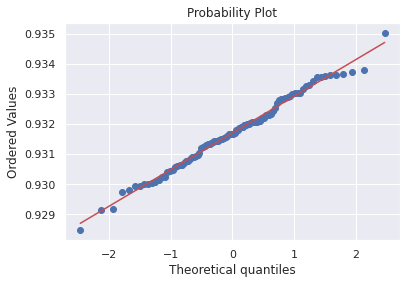

In [ ]:
from scipy import stats
import seaborn as sns
stats.probplot(sample_2, plot=sns.mpl.pyplot)
plt.show()

In [ ]:
print("mu_1=",sample_1.mean())
print("sigma_1=",sample_1.std())

print("mu_2=",sample_2.mean())
print("sigma_2=",sample_2.std())

print("mu_3=",sample_3.mean())
print("sigma_3=",sample_3.std())

print("mu_4=",sample_4.mean())
print("sigma_4=",sample_4.std())

mu_1= 0.9215197740490004
sigma_1= 0.002255920001600846
mu_2= 0.9167046515550002
sigma_2= 0.0025334792363862803
mu_3= 0.9428749999999995
sigma_3= 0.00274091704774629
mu_4= 0.9291337410549996
sigma_4= 0.0020480888349359116


# Hypothesis Test
---
We conduct a hypothesis test in order to determine if there are significant differences among the performance of our proposal and the performance reported in [[1]](https://iris.unito.it/retrieve/handle/2318/1723924/512658/S19-2007.pdf) based exclusively on those instances that refer to misogyny (semeval task 5: subtask A in Spanish).

Let $\mu_p$ and $\mu_s$ be performances of our proposal and SemEval respectively. Thus, the hypothesis to be contrasted is defined as:

$H_0:= \mu_p-\mu_s=0$

$H_1:= |\mu_s-\mu_k|>0$

We use a significance level of 0.05.  The values of $\mu_p$ and $\mu_s$ can be defined in terms of **Accuracy, Precision, Recall and F1** obtained from the mentioned experiments. These  results are shown in Table 1.

| Metric     | Statistics              |
| -----------| ---------------------------------|
| Accuracy   |  $\mu_p$=0.92 and $\sigma_p$=0.01 |
| Precision   |  $\mu_p$=0.93 and $\sigma_p$=0.01  |
| Recall   |  $\mu_p$=0.96 and $\sigma_p$=0.01  |
| F1-Score   |  $\mu_p$=0.94 and $\sigma_p$=0.01  |






**Test 1: $\mu_p (accuracy)$ vs. $\mu_s(accuracy)$**

In [ ]:
from seaborn.utils import ci
#!pip install pingouin
from pingouin import ttest
ms=np.log10(0.73) #Valor de referencia
test=ttest(np.array(sample_1),ms,confidence=0.95)
test

print(10**(-0.04))

print(10**(-0.03))

0.9120108393559098
0.933254300796991


The test  shows  that there is a **significant difference** with $t(99)$= 1385.84, $p$-value < .0001. The confidence interval shows that with probability 0.95 our proposal will exhibit an accuracy between 0.91 and 0.93.

In [ ]:
from pingouin import ttest
ms=0.734
test=ttest(np.array(sample_2),ms,confidence=0.95)
test
test['CI95%']
print(10**(-0.030))

print(10**(-0.029))

0.933254300796991
0.9354056741475519
